# Run the whole deltas algorithm

In [81]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample, non_sep
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [82]:
use_data = 'datasets'

In [83]:
if use_data == 'Gaussian':
    N1 = 10
    N2 = 100
    # Gaussian (not always seperable)
    data_clf = data.get_data(
        m1=[-2, -2],
        m2=[2, 2],
        cov1=[[1, 0], [0, 1]],
        cov2=[[1, 0], [0, 1]],
        N1=N1,
        N2=N2,
        scale=False,
        seed=10,
        )
    model = 'Linear'
else:
    datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes',
                5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
                7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
                10: 'Credit Scoring 1', 11: 'Credit Scoring 2',
                12: 'Direct Marketing', 13: 'Habermans breast cancer',
                14: 'Wisconsin Breast Cancer', 15: 'Hepatitis',
                16: 'Heart Disease'}

    dataset = datasets[0]  # change ind to select dataset to use
    data_clf = data.get_real_dataset(dataset, _print=False, seed=10, scale=True)
    model = 'SVM-rbf'

## Get Classifier

Baseline
(195, 2)


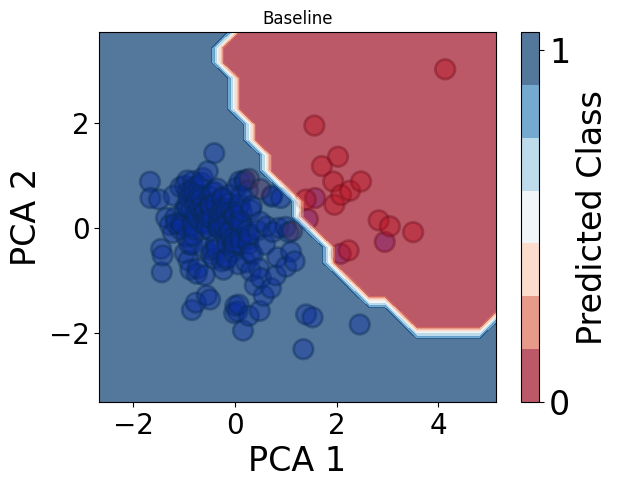

In [84]:
classifiers_dict, dim_reducer = classifier.get_classifier(
    data_clf=data_clf,
    model=model,
    balance_clf=False,
    balanced_weights=False,
    smote=False,
    costcla_methods=False,  
    return_dim_reducer=True,
    )
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas - downsample

Original Data
plotting training data as data input


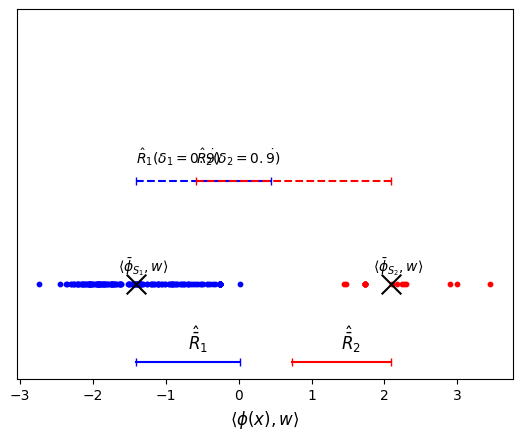

Budget 97 found 60 viable downsampled solutions
Best solution found by removing 26 data points
Downsampled Data:


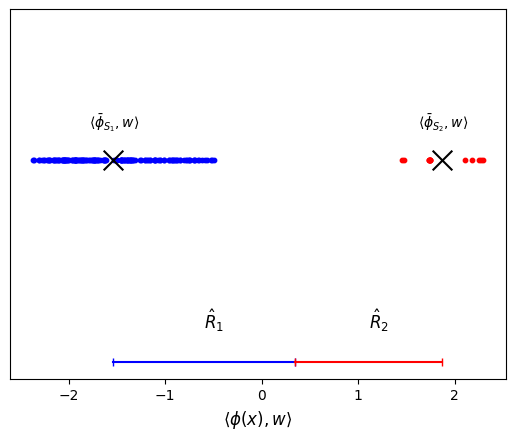

In [85]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_slacks = downsample.downsample_deltas(
    data_clf['clf']).fit(X, y, _print=True, _plot=True, max_trials=1000, grid_search=True)

## Fit deltas - non sep loss version

Min Loss


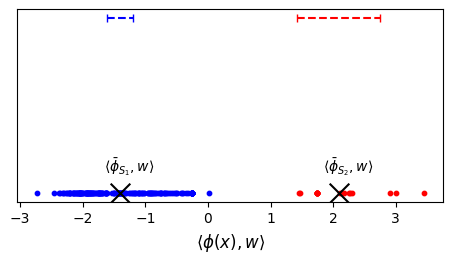

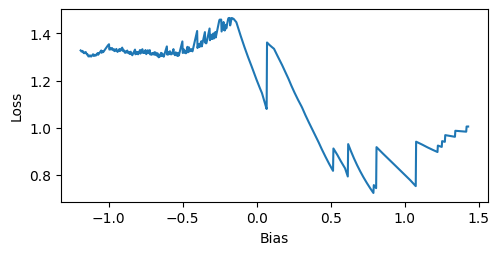

In [86]:

X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
print('Min Loss')
deltas_min = non_sep.deltas(
    clf).fit(X, y, loss_type='min', _plot=True)

Max Loss


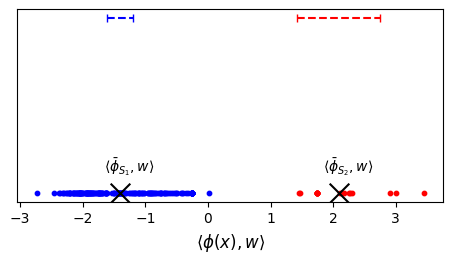

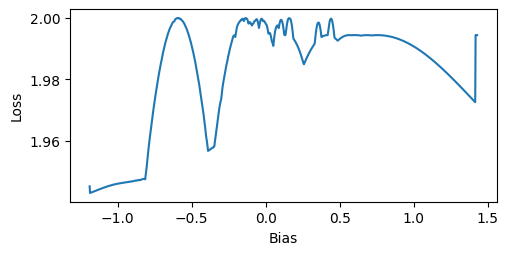

In [87]:
print('Max Loss')
deltas_max = non_sep.deltas(
    clf).fit(X, y, loss_type='max', _plot=True)

Avg Loss


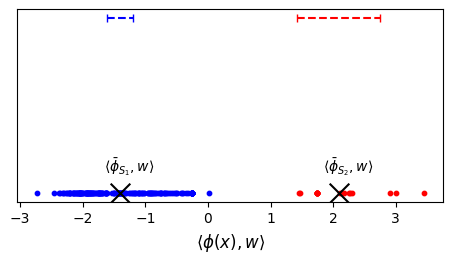

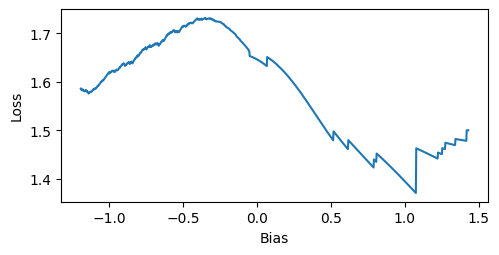

In [88]:
print('Avg Loss')
deltas_avg = non_sep.deltas(
    clf).fit(X, y, loss_type='mean', _plot=True)

Furthest Point


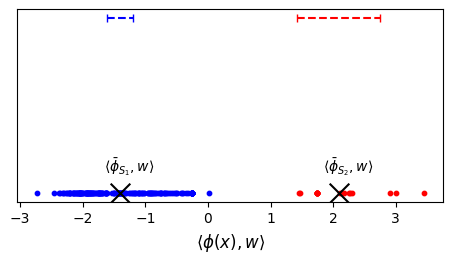

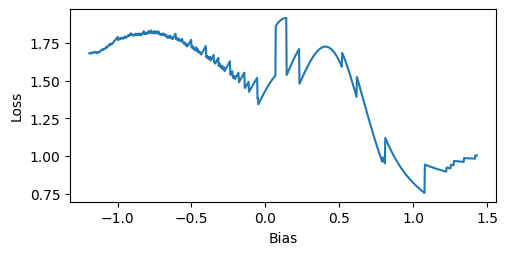

In [89]:
print('Furthest Point')
deltas_f = non_sep.deltas(
    clf).fit(X, y, only_furtherest_k=True, _plot=True)

In [90]:
# deltas.get_generalisation_error(1, only_furthest=False)

# Evaluation on test data

                 Accuracy    G-Mean        F1
Method                                       
Baseline         0.895722  0.894427  0.888889
Deltas slacks    0.949198  0.950064  0.949333
Deltas min       0.893048  0.891556  0.885714
Deltas max       0.834225  0.808475  0.862832
Deltas avg       0.858289  0.853349  0.842730
Deltas furthest  0.858289  0.853349  0.842730 


Baseline
(374, 2)


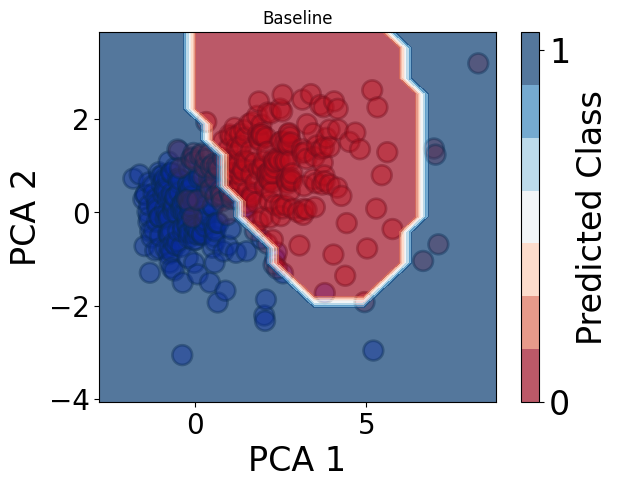

Deltas slacks
(374, 2)


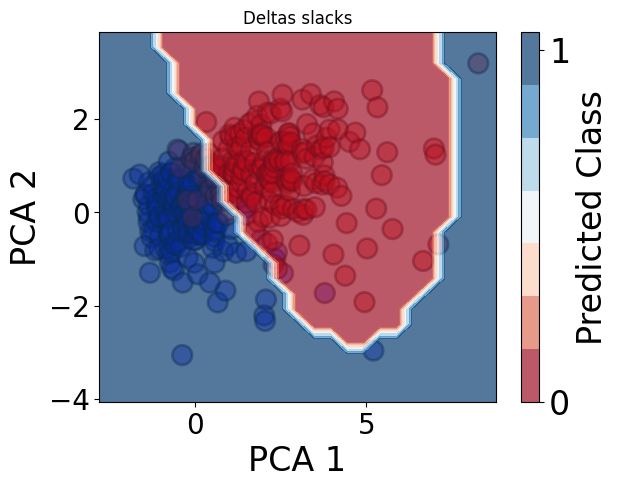

Deltas min
(374, 2)


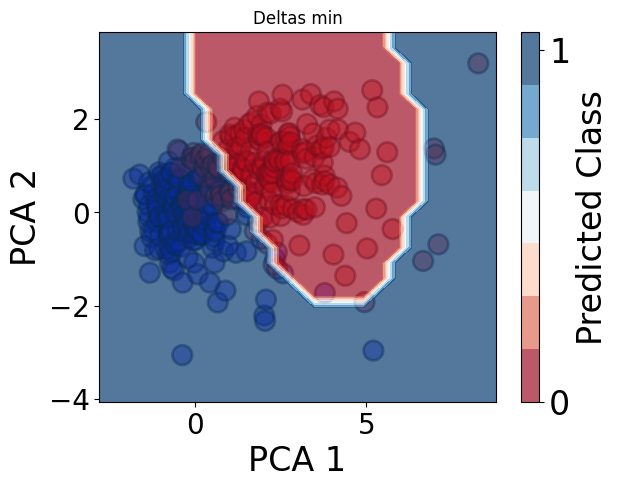

Deltas max
(374, 2)


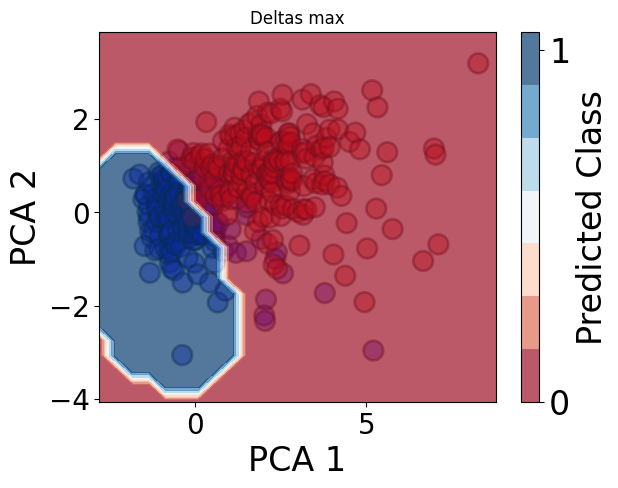

Deltas avg
(374, 2)


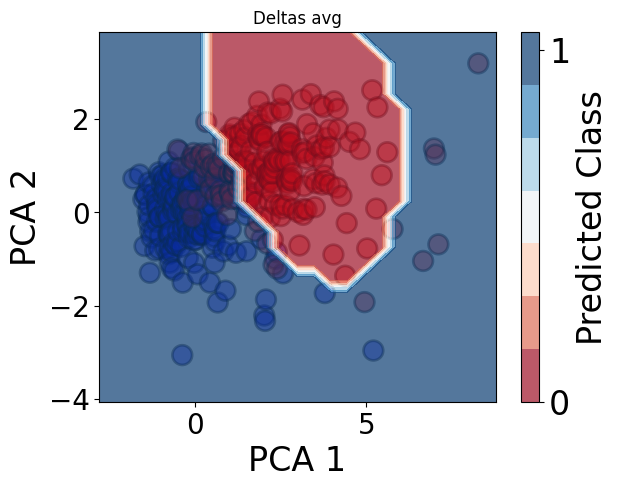

Deltas furthest
(374, 2)


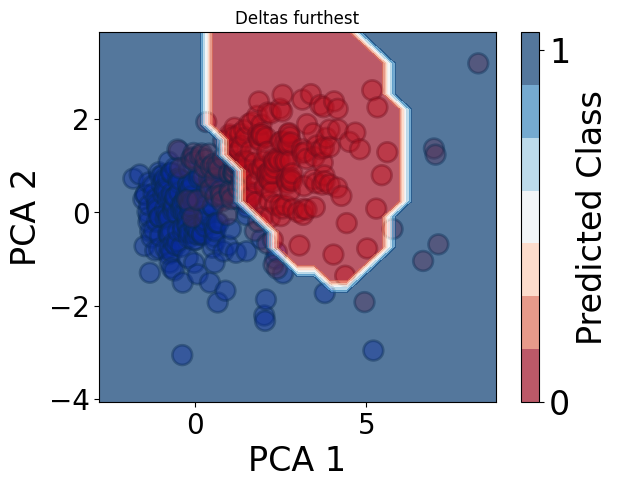

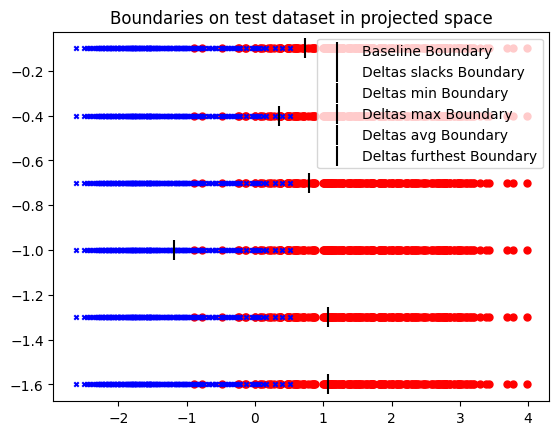

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.895722,0.894427,0.888889
Deltas slacks,0.949198,0.950064,0.949333
Deltas min,0.893048,0.891556,0.885714
Deltas max,0.834225,0.808475,0.862832
Deltas avg,0.858289,0.853349,0.842730
Deltas furthest,0.858289,0.853349,0.842730


In [91]:
classifiers_dict['Deltas slacks'] = deltas_slacks
classifiers_dict['Deltas min'] = deltas_min
classifiers_dict['Deltas max'] = deltas_max
classifiers_dict['Deltas avg'] = deltas_avg
classifiers_dict['Deltas furthest'] = deltas_f
evaluation.eval_test(classifiers_dict,
                     data_clf['data_test'], 
                     _print=True, 
                     _plot=True,
                     dim_reducer=dim_reducer)